# Shot Grouping Detection

## Dependencies

OpenCV3, numpy, pandas

In [1]:
import os
import numpy as np
import argparse
import pandas as pd
import cv2
from matplotlib import pyplot as plt

def openimage(image):
    I8 = cv2.imread(image)
#    I8 = img_as_ubyte(io.imread(image)) #Image as UINT8
    return I8[925:2200, 1:1265] #img[y:y+h, x:x+w]
#imwrite(I8, '01-18 Original_Cropped.tif', 'compression', 'none')

In [2]:
path = os.path.join(os.path.abspath('..') , 'data', 'Shots', 'S1705713417071412470.tiff')
bgr_img = openimage(path)

print(bgr_img.shape)
if bgr_img.shape[-1] == 3:           # color image
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img


ret2,t_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


(1275, 1264, 3)


171.0


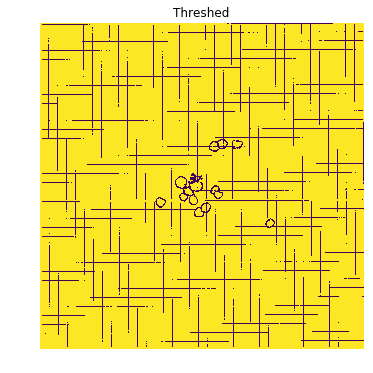

In [3]:
print(ret2)
threshimage = cv2.cvtColor(t_img,cv2.COLOR_GRAY2BGR)

binary = gray_img > ret2

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(binary)
ax.set_title('Threshed')
ax.set_axis_off()

plt.show()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


<IPython.core.display.Javascript object>


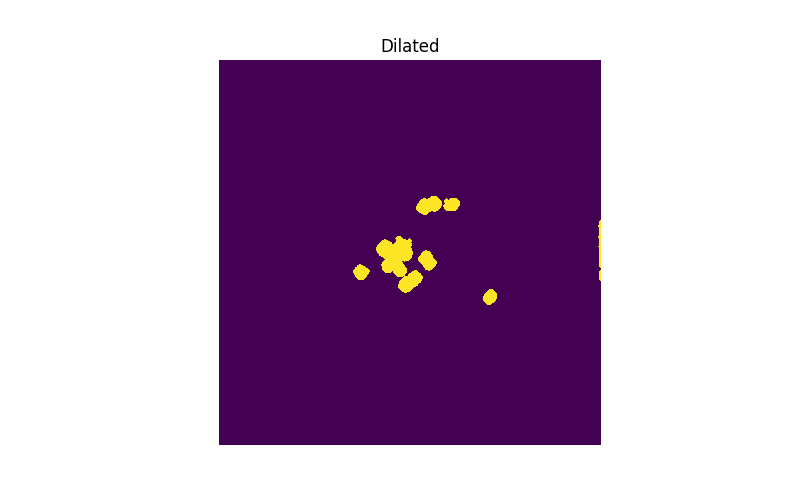

In [56]:
#dilate image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
blur_img = cv2.medianBlur(t_img, 7)
#invert
inverted = cv2.bitwise_not(blur_img)
#closing = cv2.morphologyEx(inverted, cv2.MORPH_CLOSE, kernel)
dilation = cv2.dilate(inverted,kernel,iterations = 6)


im_fill = dilation.copy()

h, w = dilation.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_fill, mask, (0,0), 255);
#invert
fillinverted = cv2.bitwise_not(im_fill)

im_out = dilation | fillinverted

print(dilation)

#closing = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
#morph = cv2.morphologyEx(im_out, cv2.MORPH_CLOSE, kernel)
#dist = cv2.distanceTransform(morph, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)

fig, ax = plt.subplots(figsize=(8, 5))
ax.imshow(im_out)
ax.set_title('Dilated')
ax.set_axis_off()

plt.show()

In [46]:
def hough_circle(t_img):
    img = cv2.medianBlur(t_img, 7)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                                param1=50,param2=30,minRadius=0,maxRadius=0)
    
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    return cimg

In [ ]:
cimg = hough_circle(t_img)

fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
ax = axes.ravel()
    
ax[0].imshow(rgb_img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cimg)
ax[1].set_title('Output')
ax[1].axis('off')

plt.show()

In [55]:
%matplotlib notebook
print(im_out)
cimg = hough_circle(im_out)

fig, ax = plt.subplots(figsize=(8, 5))
ax.imshow(cimg)
ax.set_title('Dilated')
ax.set_axis_off()

plt.show()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


AttributeError: 'NoneType' object has no attribute 'rint'